In [1]:
import requests
from bs4 import BeautifulSoup

response = requests.get("http://www.paullab.co.kr/stock.html")

response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

In [2]:
soup.select('.main')[0]
soup.select('.main')[1]
soup.select('.main')[2]
soup.select('.main')[3]

<div class="main">
<h2 id="제주코딩베이스캠프학원">제주코딩베이스캠프 학원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date ">2019.10.23</span></td>
<td class="num "><span>2,600</span></td>
<td class="num ">
<img height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            600
                        </span>
</td>
<td class="num "><span>2,055</span></td>
<td class="num "><span>2,600</span></td>
<td class="num "><span>2,020</span></td>
<td class="num "><span>2,203,110</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>2,000</span></td>
<td class="num">
<img alt="상승" height="6" src="ico_up.gif" style="margin-right:4px;" width="7"/><span>
        

In [3]:
그룹사별일일시가 = soup.select('.main')
오늘종가 = []
오늘시가총액 = []

for i in 그룹사별일일시가:
    print(i.select('.table > tbody > tr')[1].select('td')[1])
    print(i.select('.table > tbody > tr')[1].select('td')[1].text)
    print(i.select('.table > tbody > tr')[1].select('td')[1].text.replace(',', ''))

<td class="num "><span>6,650</span></td>
6,650
6650
<td class="num"><span>31,300</span></td>
31,300
31300
<td class="num "><span>13,250</span></td>
13,250
13250
<td class="num "><span>2,600</span></td>
2,600
2600


In [4]:
그룹사별일일시가 = soup.select('.main')
오늘종가 = []
오늘시가총액 = []

for i in 그룹사별일일시가:
    오늘종가.append(int(i.select('.table > tbody > tr')[1].select('td')[1].text.replace(',', '')))

In [5]:
오늘시가총액 = [i*10000 for i in 오늘종가]
전그룹사시가총액 = format(sum(오늘시가총액), ',')
전그룹사시가총액

'538,000,000'

In [6]:
그룹사별일일시가 = soup.select('.main')
오늘종가 = []
오늘시가총액 = []
for j in range(1, len(soup.select('.main')[0].select('table > tbody > tr'))):
    오늘종가 = []
    for i in 그룹사별일일시가:
        오늘종가.append(int(i.select('.table > tbody > tr')[j].select('td')[1].text.replace(',', '')))
    오늘시가총액.append(sum(오늘종가))
오늘시가총액

[53800,
 53180,
 53615,
 52305,
 49035,
 48755,
 46970,
 46140,
 45900,
 45765,
 44000,
 43210,
 43830,
 44310,
 44850,
 44370,
 43935,
 44180,
 44410,
 46245]

In [8]:
날짜전체 = soup.select('.main')[0].select('.table > tbody > tr > td > .date')
date = [i.text for i in 날짜전체]
date

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

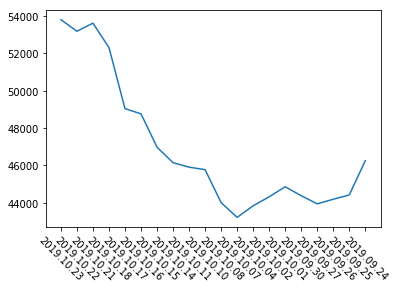

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(date, 오늘시가총액)
plt.xticks(rotation = -45 )
plt.show()

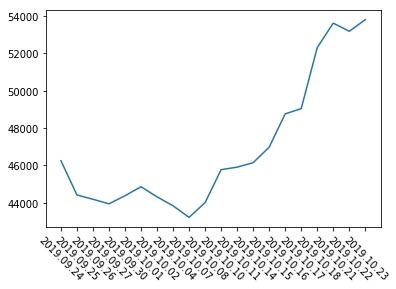

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(date[::-1], 오늘시가총액[::-1])
plt.xticks(rotation = -45 )
plt.show()

In [37]:
그룹사별일일데이터 = soup.select('.main')
그룹사별일일거래량 = [[],[],[],[]]
그룹사전체일일거래량 = []
# 데이터 구조 : 
# 그룹사별일일거래량 = [[출판사], [연구원], [공업사], [학원]]

In [38]:
그룹사별일일데이터[0].select('.table > tbody > tr')[0]
그룹사별일일데이터[0].select('.table > tbody > tr')[1].select('td')[-1].text.replace(',', '')

'398421'

In [39]:
for j in range(1, len(soup.select('.main')[0].select('table > tbody > tr'))):
    그룹사별일일거래량[0].append(int(그룹사별일일데이터[0].select('.table > tbody > tr')[j].select('td')[-1].text.replace(',', '')))
    그룹사별일일거래량[1].append(int(그룹사별일일데이터[1].select('.table > tbody > tr')[j].select('td')[-1].text.replace(',', '')))
    그룹사별일일거래량[2].append(int(그룹사별일일데이터[2].select('.table > tbody > tr')[j].select('td')[-1].text.replace(',', '')))
    그룹사별일일거래량[3].append(int(그룹사별일일데이터[3].select('.table > tbody > tr')[j].select('td')[-1].text.replace(',', '')))

In [40]:
그룹사별일일거래량[0]
그룹사별일일거래량[1]
그룹사별일일거래량[2]
그룹사별일일거래량[3]
len(그룹사별일일거래량[0])
그룹사별일일거래량[0]

[398421,
 919571,
 1678055,
 2168857,
 1982922,
 839434,
 702104,
 764800,
 134558,
 288563,
 223839,
 199580,
 188467,
 160510,
 246145,
 705046,
 408859,
 404633,
 441923,
 211019]

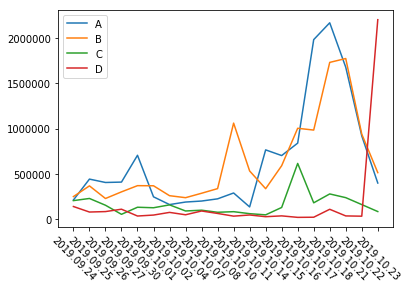

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(date[::-1], 그룹사별일일거래량[0][::-1], label='A')
plt.plot(date[::-1], 그룹사별일일거래량[1][::-1], label='B')
plt.plot(date[::-1], 그룹사별일일거래량[2][::-1], label='C')
plt.plot(date[::-1], 그룹사별일일거래량[3][::-1], label='D')
plt.xticks(rotation = -45 )
plt.legend(loc=2)
plt.show()

In [53]:
for i in range(len(그룹사별일일거래량[0])):
    s = 0
    for j in range(4):
        s += 그룹사별일일거래량[j][i]
    그룹사전체일일거래량.append(s)
그룹사전체일일거래량

[3198301,
 2051067,
 3724291,
 4286651,
 3167249,
 2477184,
 1456343,
 1174487,
 771938,
 1463947,
 698527,
 673095,
 562816,
 650582,
 784490,
 1239662,
 872050,
 868624,
 1115164,
 803201]

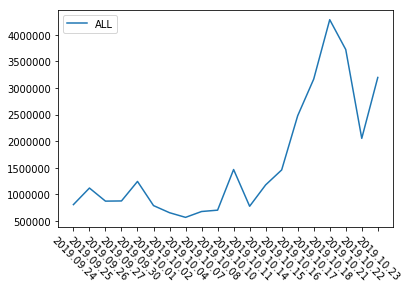

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(date[::-1], 그룹사전체일일거래량[::-1], label='ALL')
plt.xticks(rotation = -45 )
plt.legend(loc=2)
plt.show()

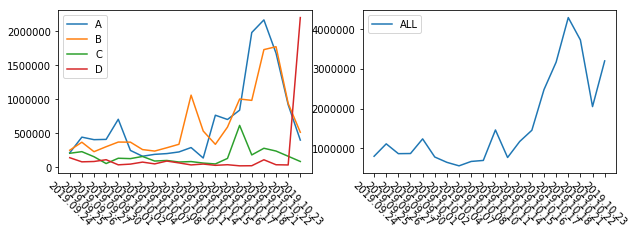

In [78]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax.plot(date[::-1], 그룹사별일일거래량[0][::-1], label='A')
ax.plot(date[::-1], 그룹사별일일거래량[1][::-1], label='B')
ax.plot(date[::-1], 그룹사별일일거래량[2][::-1], label='C')
ax.plot(date[::-1], 그룹사별일일거래량[3][::-1], label='D')
plt.xticks(rotation = -45)
ax.legend(loc=2)

ax2 = f.add_subplot(122)
ax2.figsize=(15,15)
ax2.plot(date[::-1], 그룹사전체일일거래량[::-1], label='ALL')
plt.xticks(rotation = -45)
ax2.legend(loc=2)